In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from  matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
seaborn.set(style='ticks')

In [4]:
df= pd.read_csv('./flame.txt',sep="\t",header=None)
df.columns = ["V1", "V2", "Y"]
df.head()
np.unique(df["Y"])

array([1, 2], dtype=int64)

In [5]:
df.head()

,V1,V2,Y
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
V1    240 non-null float64
V2    240 non-null float64
Y     240 non-null int64
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [6]:
df.describe()

,V1,V2,Y
count,240.000000,240.000000,240.000000
mean,7.323750,20.928542,1.637500
std,3.202509,3.383390,0.481727
min,0.500000,14.450000,1.000000
25%,5.250000,18.237500,1.000000
50%,7.300000,20.775000,2.000000
75%,9.312500,23.562500,2.000000
max,14.200000,27.800000,2.000000


In [9]:
print("nombre d'elt classe 1:",len(df[df['Y'] == 1]))
print("nombre d'elt classe 2:",len(df[df['Y'] == 2]))


nombre d'elt classe 1: 87
nombre d'elt classe 2: 153


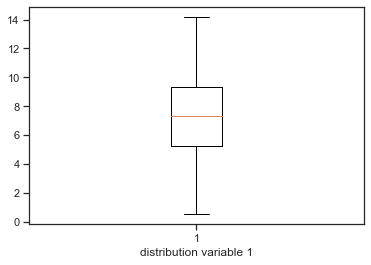

In [44]:
fig = plt.figure()
plt.xlabel('distribution variable 1' )
plt.boxplot(df['V1'])
plt.show()
#pas des valeurs aberrantes

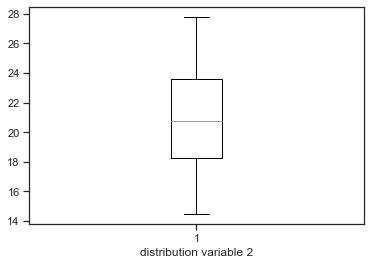

In [45]:
fig = plt.figure()
plt.boxplot(df['V2'])
plt.xlabel('distribution variable 2' )
plt.show()

[1, 2]
(2,)


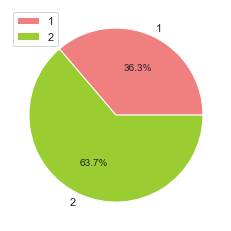

In [11]:
x = [87,153]
vectLab=np.unique(df["Y"]).tolist()
print(vectLab)
print(np.unique(df["Y"]).shape)
color_map = ['#F08080',  "yellowgreen"]
plt.pie(x, labels =vectLab ,colors=color_map,autopct='%1.1f%%')
plt.legend()
plt.show()

Data modeling

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[['V1','V2']],df['Y'], test_size=0.02, random_state=0)

In [14]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\majda\Anaconda3\lib\site-packages\

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
data = {'Algorithme':['Reg Log'],'Accuracy':[logreg_cv.best_score_]}
models_dataframe=pd.DataFrame.from_dict(data)
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341


In [16]:
#GaussianNB().get_params().keys()
gnb = GaussianNB()
y_predNB = gnb.fit(X_train, y_train).predict(X_test)

In [17]:
accuracy_score(y_predNB,y_test)

1.0

In [18]:
models_dataframe.loc[1] = {'Algorithme':'NB','Accuracy': accuracy_score(y_predNB,y_test)}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341
1,NB,1.000000


K Nearest Neighbors

In [20]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

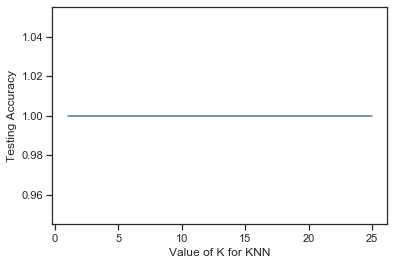

In [21]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [22]:
skf = StratifiedKFold(n_splits=5)
knn = KNeighborsClassifier(n_neighbors = 12)
scores=cross_val_score(knn,X_train, y_train, cv=skf)

In [23]:
scores

array([1.        , 0.9787234 , 1.        , 1.        , 0.95744681])

In [24]:
models_dataframe.loc[2] = {'Algorithme':'KNN','Accuracy': scores.mean()}

In [25]:
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341
1,NB,1.000000
2,KNN,0.987234


In [26]:
lda = LDA(n_components=2)
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(lda, X_train, y_train, cv=skf)

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting 

In [27]:
models_dataframe.loc[3] = {'Algorithme':'LDA','Accuracy': score.mean()}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341
1,NB,1.000000
2,KNN,0.987234
3,LDA,0.880851


In [28]:
qda = QDA()
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(qda, X_train, y_train, cv=skf)

In [29]:
models_dataframe.loc[4] = {'Algorithme':'QDA','Accuracy': score.mean()}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341
1,NB,1.000000
2,KNN,0.987234
3,LDA,0.880851
4,QDA,0.957447


In [30]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [31]:
parameter = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

In [32]:
skf = StratifiedKFold(n_splits=5)
svmLN = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, cv=skf)
svmLN.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
print('Best C:',svmLN.best_estimator_.C) 
print('Best Kernel:',svmLN.best_estimator_.kernel)

Best C: 1000
Best Kernel: linear


In [35]:
models_dataframe.loc[5] = {'Algorithme':'SVM Linear','Accuracy': svmLN.best_score_}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341
1,NB,1.000000
2,KNN,0.987234
3,LDA,0.880851
4,QDA,0.957447
5,SVM Linear,0.889362


In [36]:
skf = StratifiedKFold(n_splits=5)
svmrbf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter, cv=skf)
svmrbf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
models_dataframe.loc[6] = {'Algorithme':'SVM RBF','Accuracy': svmrbf.best_score_}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341
1,NB,1.000000
2,KNN,0.987234
3,LDA,0.880851
4,QDA,0.957447
5,SVM Linear,0.889362
6,SVM RBF,0.991489


In [38]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,4,5,6,7,8,9,10,11,12,15,20]}
skf = StratifiedKFold(n_splits=5)
dtc = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=skf)
dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [39]:
models_dataframe.loc[7] = {'Algorithme':'Tree D','Accuracy': dtc.best_score_}

In [40]:
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.881341
1,NB,1.000000
2,KNN,0.987234
3,LDA,0.880851
4,QDA,0.957447
5,SVM Linear,0.889362
6,SVM RBF,0.991489
7,Tree D,0.978723


Random forest

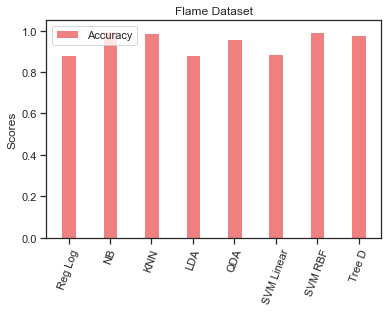

In [43]:

labels=models_dataframe.Algorithme.values
x = np.arange(len(models_dataframe.Algorithme.values ))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects2 = ax.bar(x, models_dataframe.Accuracy.values , width, label='Accuracy',color='#F08080')
ax.set_ylabel('Scores')
ax.set_title('Flame Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=70)
ax.legend()